In [1]:
mtDEM = np.load('./data/mt_dem_180m.npy')
wyDEM = np.load('./data/wy_dem_180m.npy')
mtSnotel = pd.read_pickle('./data/mt_snotels.pcl')
wySnotel = pd.read_pickle('./data/wy_snotels.pcl')

In [6]:
380832./mtSnotel.shape[0]

4139.478260869565

In [7]:
253350./wySnotel.shape[0]

2585.204081632653

In [2]:
n,m = mtDEM.shape
mtDEM.shape = n*m
n,m = wyDEM.shape
wyDEM.shape = n*m
mtDEM = mtDEM[np.isnan(mtDEM) != 1]
wyDEM = wyDEM[np.isnan(wyDEM) != 1]

In [23]:
mtweights = np.ones_like(mtDEM)/float(len(mtDEM))
wyweights = np.ones_like(wyDEM)/float(len(wyDEM))

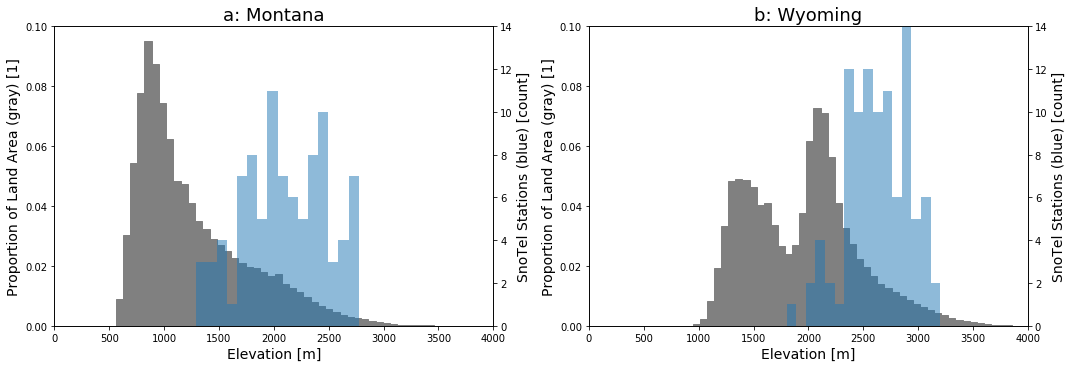

In [46]:
bins = 50
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.hist(mtDEM,bins,weights=mtweights,facecolor='0.5',edgecolor = '0.5');
ax11 = ax1.twinx()
ax11.hist(mtSnotel.elev,int(bins/3),alpha=0.5)
ax2.hist(wyDEM,bins,weights=wyweights,facecolor='0.5',edgecolor = '0.5');
ax21 = ax2.twinx()
ax21.hist(wySnotel.elev,int(bins/3),alpha=0.5)
ax1.set_xlim(0,4000);
ax2.set_xlim(0,4000);
ax1.set_ylim(0,0.1);
ax2.set_ylim(0,0.1);
ax11.set_ylim(0,14);
ax21.set_ylim(0,14);
ax21.set_ylabel('SnoTel Stations (blue) [count]', fontsize=14)
ax11.set_ylabel('SnoTel Stations (blue) [count]', fontsize=14)
ax1.set_ylabel('Proportion of Land Area (gray) [1]', fontsize =14)
ax2.set_ylabel('Proportion of Land Area (gray) [1]', fontsize=14)

# loop through each snotel data frame
#for elev in mtSnotel.elev:
#    ax1.axvline(elev,color='k',alpha=0.5)
    
# loop through each snotel data frame
#for elev in wySnotel.elev:
#    ax2.axvline(elev,color='k',alpha=0.5)

ax1.set_xlabel('Elevation [m]', fontsize=14)
ax2.set_xlabel('Elevation [m]', fontsize=14)
plt.tight_layout()
ax1.set_title('a: Montana', fontsize = 18)
ax2.set_title('b: Wyoming', fontsize = 18)
plt.savefig('./figures/hyposometry_snotel.png',dpi=300,bbox_inches='tight')